# Lab | Classification, Handling Imbalanced Data

# import the required python libraries

In [97]:
import pandas as pd
import numpy as np;
import scipy;
## plotting libraries
from matplotlib import pyplot as plt
import seaborn as sns
## stats Libraries
from scipy import stats
import statsmodels.api as sm
## Sklearn libraries
from sklearn import model_selection
from sklearn import metrics as metrics
from sklearn import preprocessing
from sklearn import linear_model as lm
%matplotlib inline
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_rows', 200)

# load classification sample datasets

In [98]:
dataset = pd.read_csv("DATA_Customer-Churn.csv")

# Check the datatypes of all the columns

In [99]:
dataset

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [100]:
dataset.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Convert the Object column (Total Charge) into numeric type using pd.to_numeric function.

In [101]:
from sklearn import datasets

dataset["TotalCharges"] = pd.to_numeric(dataset["TotalCharges"], errors='coerce')

# Checking for null values in the dataframe. Replace the null values.

In [102]:
dataset['TotalCharges'].fillna(dataset['TotalCharges'].mean(), inplace=True)

In [103]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

In [104]:
# So found that the dataframe dose not have any null values

In [105]:
dataset.drop(["gender", 
         "Partner", 
         "Dependents",
         "PhoneService", 
         "OnlineSecurity", 
         "OnlineBackup", 
         "DeviceProtection",  
         "TechSupport", 
         "StreamingTV", 
         "StreamingMovies",
         "Contract"], axis = 1, inplace = True)

In [106]:
dataset

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,No
1,0,34,56.95,1889.50,No
2,0,2,53.85,108.15,Yes
3,0,45,42.30,1840.75,No
4,0,2,70.70,151.65,Yes
...,...,...,...,...,...
7038,0,24,84.80,1990.50,No
7039,0,72,103.20,7362.90,No
7040,0,11,29.60,346.45,No
7041,1,4,74.40,306.60,Yes


In [107]:
dataset["Churn"]=dataset["Churn"].map(dict(Yes=1,No=0))
dataset["Churn"].unique()

array([0, 1])

# train_test_split
splitting the data into train and test sets

In [108]:
X = dataset.drop(["Churn"], axis =1)
y = dataset["Churn"]

In [109]:
X_train, X_test, y_train, y_test=model_selection.train_test_split(X, y, test_size=.20,random_state=123)

 # Knn_Classification

In [110]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2,weights='uniform')
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)
#model.predict_proba(inputdata)

 # classification_plot_confusion_matrix
# Classification Model confusion matrix for training and test set

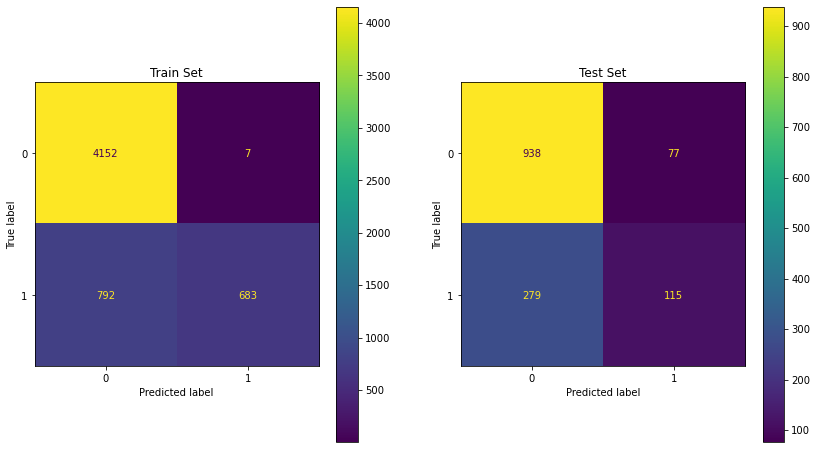

In [111]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(1,2, figsize=(14,8))

plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

# classification_model_evaluating
# Classification Model Metrics

In [112]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

def evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test):
    performance_dataset = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})
    
    pd.options.display.float_format = '{:.2f}'.format

    dataset_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    dataset_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance_dataset, dataset_train, dataset_test

## calling the function
error_metrics_dataset,y_train_vs_predicted, \
    y_test_vs_predicted=evaluate_classification_model(y_train, y_pred_train,
                                                    y_test, y_pred)
error_metrics_dataset

,Error_metric,Train,Test
0,Accuracy,0.86,0.75
1,Precision,0.99,0.60
2,Recall,0.46,0.29


In [113]:
y_pred_train

array([1, 0, 0, ..., 1, 0, 0])

In [114]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

In [115]:
#!pip install graphviz
#conda install -c conda-forge python-graphviz

# Decision trees
# Loading a dataset for classification

,Error_metric,Train,Test
0,Accuracy,0.79,0.77
1,Precision,0.64,0.64
2,Recall,0.41,0.42


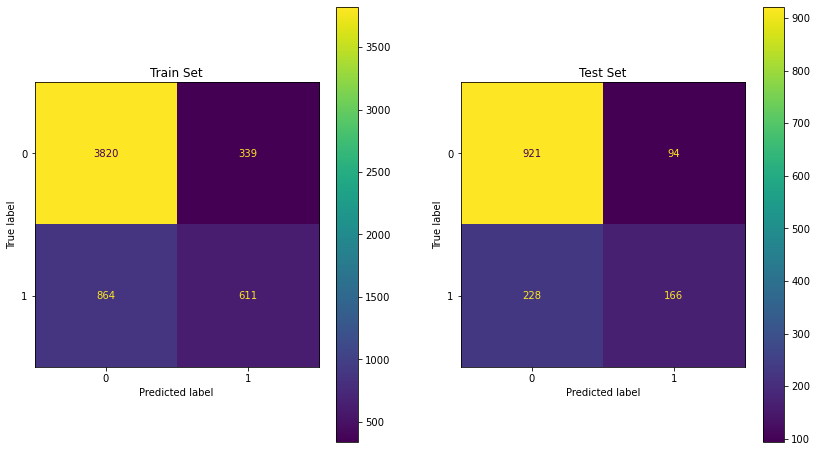

In [116]:
# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
model = DecisionTreeClassifier(max_depth=3)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

# Features Importances

<BarContainer object of 4 artists>

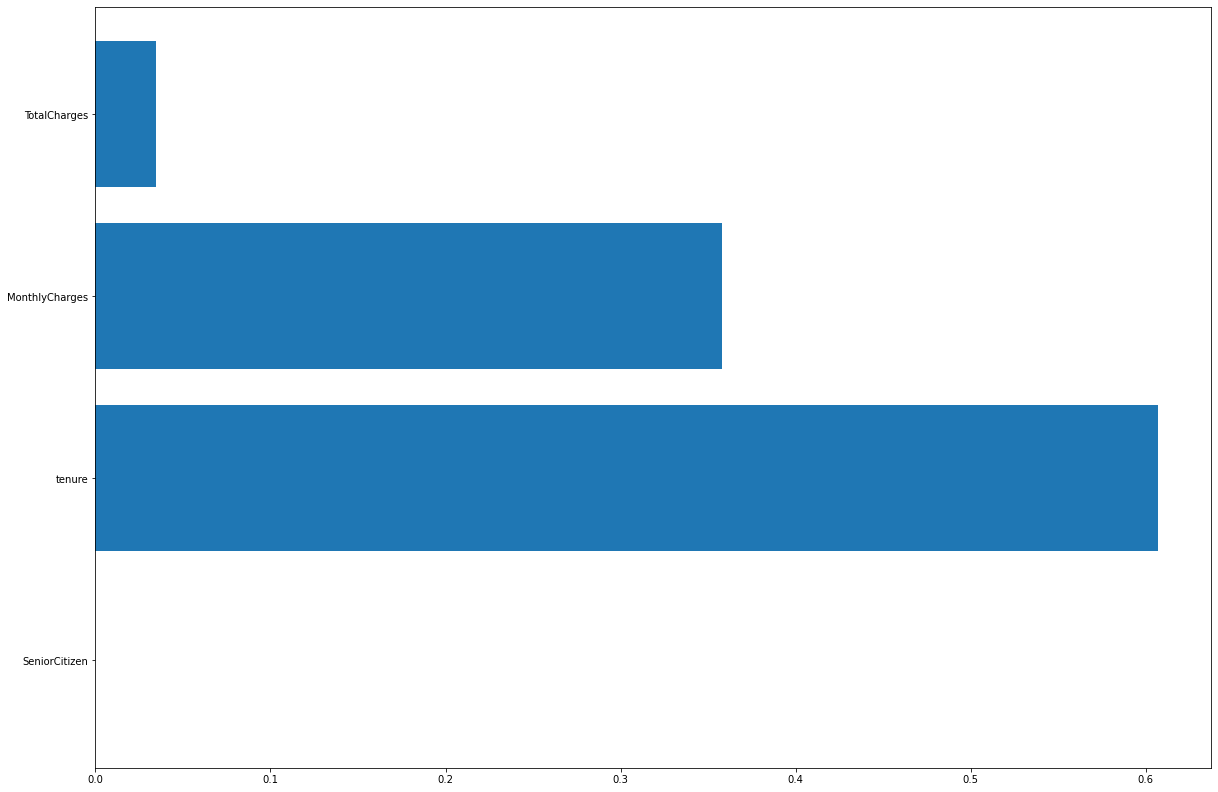

In [117]:
plt.figure(figsize=(20,14))
plt.barh(X.columns,model.feature_importances_)

# Fit a Decision Tree Classifier on the training data.

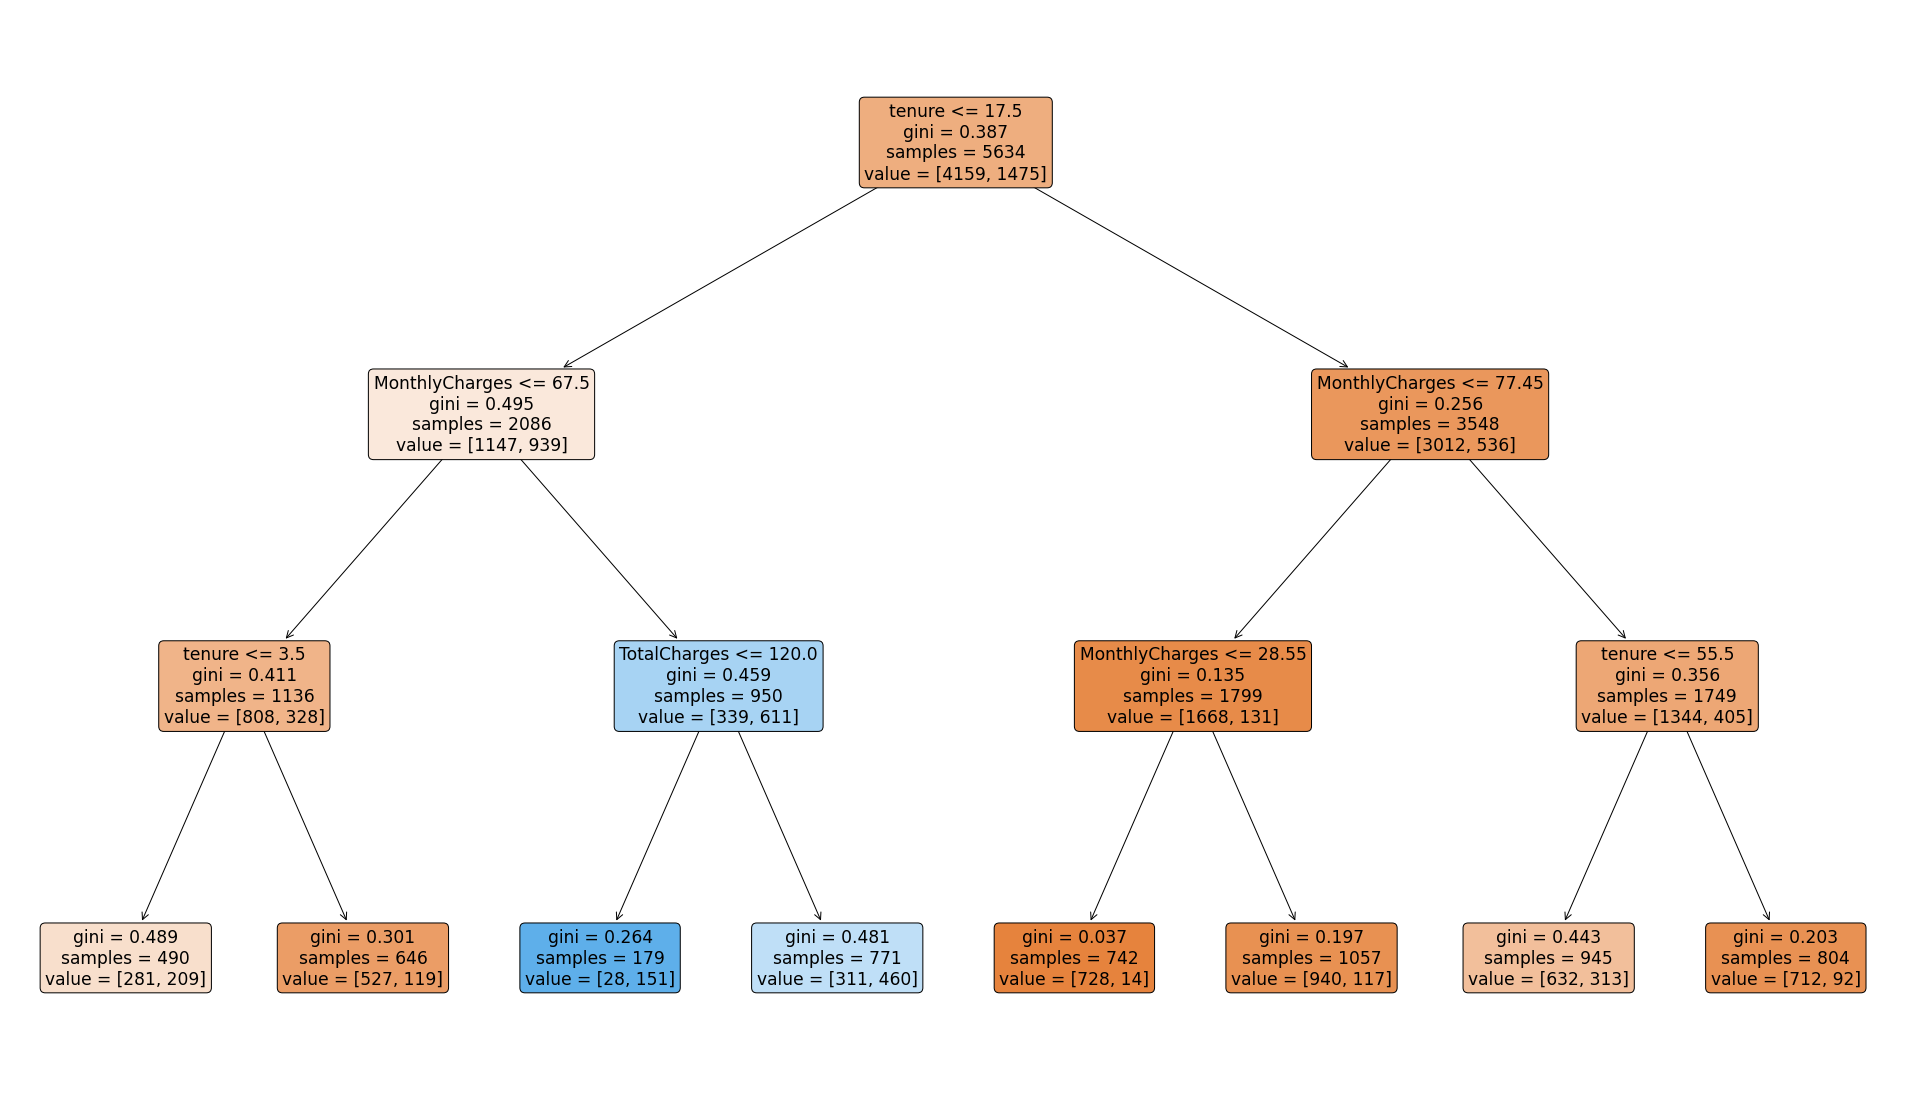

In [119]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(model,filled = True, rounded=True,feature_names=X.columns)
plt.show() 

# IMPORT DECISION TREE

In [120]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

# Validating with Decision Tree

In [153]:
X, y = load_boston(return_X_y=True)
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

print(X_train.shape)
print(model.score(X_test, y_test))
print(model.score(X_train, y_train))

(506, 13)
(506,)
(404, 13)
0.7544546464185642
1.0


In [122]:
scores=cross_val_score(model, X_train, y_train, cv=5)
scores

array([0.8914165 , 0.62039578, 0.82696098, 0.70465904, 0.78760882])

# checking accuracy of this model

In [123]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.77 accuracy with a standard deviation of 0.09


# Decision Trees Classification

In [124]:
X, y = load_iris(return_X_y=True)
print(X.shape)
print(y.shape)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
mo= DecisionTreeClassifier()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
print(model.score(X_train, y_train))

(150, 4)
(150,)
0.9129172714078374
1.0


In [125]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# multi class problem

In [126]:
set(y)

{0, 1, 2}

In [127]:
scores=cross_val_score(model, X_train, y_train, cv=5)
scores

array([0.93162393, 1.        , 0.86206897, 1.        , 1.        ])

In [128]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.96 accuracy with a standard deviation of 0.06


In [129]:
y_test

array([2, 0, 1, 2, 2, 0, 0, 0, 0, 1, 2, 0, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 2, 2, 2, 2, 2])

In [130]:
y_pred = cross_val_predict(model, X_test, y_test, cv=5)
y_pred

array([2., 0., 1., 2., 2., 0., 0., 0., 0., 2., 2., 0., 2., 1., 0., 2., 1.,
       1., 0., 1., 0., 0., 2., 0., 0., 2., 2., 1., 2., 2.])

# Models Comparision

In [131]:
model1 = DecisionTreeRegressor()

model2 = LinearRegression()

model3 = KNeighborsRegressor()

model_pipeline = [model1, model2, model3]
model_names = ['Regression Tree', 'Linear Regression', 'KNN']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'Regression Tree': 0.9472001178897731, 'Linear Regression': 0.9134621311473813, 'KNN': 0.9339067453498888}


# fit a Random forest Classifier on the data and compare the accuracy.

In [132]:
from sklearn.ensemble import RandomForestClassifier

In [133]:
clf = RandomForestClassifier(max_depth=6,min_samples_leaf=20,max_features=None,n_estimators=100,
                             bootstrap=True,oob_score=True, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9666666666666667
0.9


In [134]:
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [135]:
numerical = ('dataset' +'numerical.csv')

In [136]:
numerical = ('dataset' +'numerical.csv')
categorical = ('dataset' +'categorical.csv')
targets = ('dataset'+'target.csv')

In [137]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(dataset)
categorical_columns = categorical_columns_selector(dataset)

# # Since SMOTE works on numerical data only, we will first encode the categorical variables in this case 

In [138]:
dataset[categorical_columns]

""
0
1
2
3
4
...
7038
7039
7040
7041


In [139]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(dataset[categorical_columns])
encoded_categorical = encoder.transform(dataset[categorical_columns])
#encoded_categorical = pd.DataFrame(encoded_categorical_columns)

In [140]:
encoded_categorical

<7043x0 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

# Training the Algorithm

In [148]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [149]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.06833333333333333
Mean Squared Error: 0.04458333333333333
Root Mean Squared Error: 0.2111476576553321


In [152]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets